<a href="https://colab.research.google.com/github/tusharbansal22/Tensorflow-Notebooks/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()
print("x train shape :", x_train.shape)
print("y train shape :", y_train.shape)

170498071/170498071 [==============================] - 4s 0us/step
x train shape : (50000, 32, 32, 3)
y train shape : (50000,)


In [4]:
K=len(set(y_train ))
print("number of classes :",K)

number of classes : 10


In [7]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 86s 54ms/step - loss: 1.5081 - accuracy: 0.4532 - val_loss: 1.2508 - val_accuracy: 0.5440
Epoch 2/15
1563/1563 [==============================] - 60s 39ms/step - loss: 1.1742 - accuracy: 0.5813 - val_loss: 1.0546 - val_accuracy: 0.6208
Epoch 3/15
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0228 - accuracy: 0.6352 - val_loss: 1.0786 - val_accuracy: 0.6157
Epoch 4/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9076 - accuracy: 0.6775 - val_loss: 0.9632 - val_accuracy: 0.6581
Epoch 5/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8027 - accuracy: 0.7128 - val_loss: 0.9008 - val_accuracy: 0.6838
Epoch 6/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7156 - accuracy: 0.7468 - val_loss: 0.9100 - val_accuracy: 0.6819
Epoch 7/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6285 - accuracy: 0.7749 - val_loss: 0.8891 -

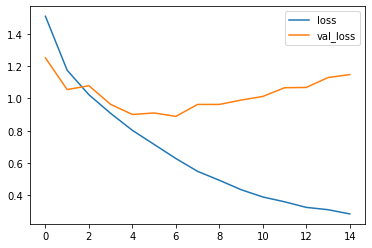

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

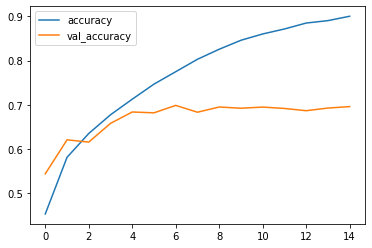

In [10]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

313/313 [==============================] - 3s 9ms/step
Confusion matrix, without normalization
[[740  20  45  14  23   2   7  16  72  61]
 [ 19 762   6   7   4   1  10   3  32 156]
 [ 65  11 547  61 113  63  74  27  21  18]
 [ 20  11  70 447  97 164  81  32  27  51]
 [ 24   5  58  49 693  45  39  64  15   8]
 [ 16   7  53 171  64 582  30  40  14  23]
 [  9  14  28  53  55  22 787   5  15  12]
 [ 13   6  21  39  75  59  10 724   4  49]
 [ 47  36  14   7  10   4   5   5 831  41]
 [ 27  57   6  14   4   7   6  11  21 847]]


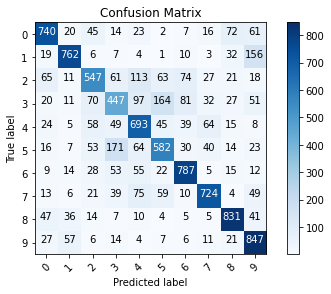

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt= '.2f' if normalize else 'd'
  thresh= cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white'if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [12]:
labels='''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

Text(0.5, 1.0, 'True label: airplane  Predicted label: deer')

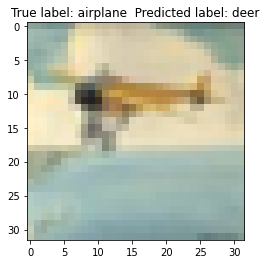

In [15]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s  Predicted label: %s'%(labels[y_test[i]],labels[p_test[i]]))